<div style="direction:rtl;line-height:200%;">
<font face="XB Zar" size=5>
<center>
به نام خداوند بخشنده‌ی مهربان
<br><br><br>
تمرین پنجم - سوال پنجم
<br><br>
</center>

</font>
    
<font face="XB Zar" size=3>
    
* در این تمرین آزادید سلول‌های جدید کد یا فایل‌های جدید `ipynb.`  یا `py.` را ایجاد کنید و کد موجود در آنها را مورد فراخوانی و استفاده قرار دهید. اما دقت کنید کد نهایی شما که باعث تولید پاسخ‌ها می‌شود بایستی از طریق فراخوانی‌های موجود در همین دفترچه اجرا شود.
* سوالات خودتان را از طریق وبسایت کوئرا بپرسید.

</font>
</div>

<hr><hr><hr>
<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=6>
<font style="color:blue;"><strong>پرسش ۱</strong> </font>
</font>
</div>

<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در این مساله می‌خواهیم استفاده از تکنیک double buffering  برای سرعت بخشیدن به الگوریتم external merge sort را بررسی کنیم. با این الگوریتم در اسلاید‌های درس آشنا شده‌اید.
<br>
گرچه این الگوریتم و هزینه‌ی آن را به صورت صریح و دقیق در اسلاید‌ها مدل نکرده‌ایم، می‌دانیم دسترسی به داده‌های نوشته شده در حافظه با locality بالا سریعتر از دسترسی تصادفی است. یعنی دسترسی به page های متوالی حافظه از طریق sequential IO سریعتر از random IO است.
<br>
به بیانی دیگر خواند ۸ صفحه‌ی متوالی از فایل A و سپس خواند ۸ صفحه‌ی متوالی از فایل B بسیار سریعتر از خواند یکی در میان صفحات A و B است.
<br>
همچنین در تکنولوژی‌های حافظه‌ی امروزی خواندن اطلاعات از حافظه معمولا سریعتر از نوشتن آن است.
<br><br>
در این مساله مدلی برای این تفاوت‌ها ارايه می‌کنیم.

* فرض می‌کنیم هر حداکثر ۸ 
<font style="color:red;"><strong>خواندن</strong> </font>
    متوالی از حافظه معادل تنها یک خواندن هزینه دارد و هزینه‌ی آن ۱ واحد IO است.
* فرض می‌کنیم هزینه‌ی هر نوشتن دو برابر هزینه‌ی هر خواندن باشد.
* نوشتن‌های متوالی مانند خواندن بدون هزینه نیستند. هزینه‌ی $N$ نوشتن متوالی همیشه $2N$ است.
<br><br>
نکات مهم دیگر:
* برای این مساله الگوریتم merge sort را همان الگوریتم ارائه شده در اسلاید‌ها با optimization های اولیه در نظر بگیرید اما از Repacking Optimization استفاده نکنید.
* فرض کنید یکی از page های buffer برای خروجی استفاده می‌شود و رزرو شده است. به عنوان مثال در این حالت یک merge $B$ طرفه نیازمند $B + 1$ page از buffer خواهد بود.
* در محاسبات خود همواره اعداد به‌دست آمده را رند کنید و از هزینه‌های به دست آمده <font style="color:red;"><strong>سقف</strong> </font> بگیرید.
* همواره بدترین حالت ممکن (worst case scenario) را در محاسبات لحاظ کنید. به عنوان مثال اگر دو خواندن می‌توانند در حالت‌هایی متوالی باشند اما این توالی کلیت ندارد این دو خواندن را random IO در نظر بگیرید.
</font>    
</div>

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف
<br>
الگوریتم external merge sort را به گونه‌ای تغییر می‌دهیم که با هدف استفاده از خواندن‌های بدون هزینه‌ی متوالی، تمام عملیات خواند به صورت 
<font style="color:red;"><strong>خواندن ۸ صفحه‌ی متوالی از حافظه</strong></font>
انجام شود.
<br><br>
هزینه‌ی اجرای الگوریتم external merge sort را با $B + 1 = 40$ صفحه‌ی buffer و فایل ورودی نامرتب ۳۲۰ صفحه‌ای محاسبه کنید.
<br>
مراحل و منطق کارتان را با استفاده از comment های پایتون در سلول جواب شرح دهید.
</font>    
</div>

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۱
<br>
هزینه‌ی دقیق split کردن و مرتب سازی فایل‌های حاصل را بر حسب واحد IO محاسبه کنید.
<br>
طبق حالت استاندارد، اجرا‌های با اندازه‌ی $B + 1$ مورد نظر هستند.
</font>
</div>

In [1]:
# In each run we have 40 pages so the run rate is "40 pages per run"
# Overall we have 320 pages, so we need (N) / (B + !) = (320 pages) / (40 pages/run) = "8 run"
# According to our 8-pages sequential chunks, IO cost for read in each run is (40 pages/run) / (8 pages/chunk read) = "(5 IO cost/run)"
# Similar to read, we have for writes as follows: (40 page/run) * (2 IO cost/write) = "(80 IO cost/run)" since each write cost is twice read cost and there is no chunk.
# Finally IO cost is calculated as follows: IO cost = Number of runs * (IO cost/run) = Number of runs * (IO cost/run of reads + IO cost/run of writes) = 8 run * (5 IO cost/run + 80 IO cost/run) = 680 IO cost
io_split_sort = 680

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۲
<br>
بعد از آنکه فایل ورودی قسمت قسمت شده و هر قسمت به صورت جداگانه مرتب شد، می‌توانیم با استفاده از فرایند merge هر $n$ اجرا را با هم ادغام کنیم. 
<br>
با فرض آنکه عملیات read همواره به صورت ۸ صفحه‌ای انجام می‌شود،
بزرگترین $n$ ممکن چیست؟
(به این عدد درجه‌ی merge می‌گویند).
</font>
</div>

In [2]:
# Since we need one page of the buffer for merge we can only use B pages to fetch. 
# Also because we always read in 8-page chunks so we can merge at most floor(B/8) runs simultaneously.
# Therefore merge_arity is floor(B/8) = floor(39/8) which is "4".
merge_arity = 4

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۳
<br>
عملیات merge چندبار (چند pass) بایستی انجام شود؟
</font>
</div>

In [3]:
# As mentioned previously, merge_arity is 4.
# Ceiling(log_{n} (num of pages) / (B + 1)) is needed to be able to merge all the pages
# Hence num of passes is = ceiling(log_{4} (320/40)) = "2" pass
merge_passes = 2

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۴
<br>
هزینه‌ی اولین اجرای (pass) فرایند merge بر حسب واحد IO چقدر است؟ 
دقت کنید که عملیات merge با بالاترین درجه ممکن بایستی استفاده شود.
</font>
</div>

In [4]:
# In the first merge pass we read all the pages and write them back all once.
# Write IO cost is = (number of pages) * (IO cost/page) = 320 * 2 = "640".
# Read IO cost is = (number of pages) / (pages/chunk) = 320 / 8 = "40" since IO cost for is 1 per chunk.
# Therefore, Single merge pass is calculated as follows: IO cost = Write IO cost + Read IO cost = 640 + 40 = "680".

merge_pass_1 = 680

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف - ۵
<br>
هزینه‌ی کلی اجرای الگوریتم external merge sort بر حسب واحد IO چقدر است؟
(در صورتی که pass های دیگری از merge باقی مانده است بایستی هزینه‌ی آنها را نیز در محاسبات خود در نظر بگیرید.)
</font>
</div>

In [5]:
# IO cost consists of (IO cost of splitting and sort) and (IO cost of merges) 
# IO cost of merges = (merge IO cost) * (merge_passes) = 680 * 2 = "1360"
# IO cost of splitting and sort is "680" (calculated previously)
# So IO cost = 680 + 1360 = 2040
total_io = 2040

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب
<br>
در این بخش پاسخ‌ها و استدلالی را که در بخش قبل مورد استفاده قرار دادیم، تعمیم خواهیم داد. تابعی به زبان python می‌نویسیم که تخمینی از هزینه‌ی IO اجرای الگوریتم external merge sort را با استفاده از یک بافر $B+1$ صفحه‌ای برای یک فایل نامرتب $N$ صفحه‌ای محاسبه کند. در اینجا عملیات خواندن را به جای ۸ صفحه‌ی متوالی در $P$ صفحه‌ی متوالی انجام خواهیم داد.
<br>
دقت کنید نتیجه‌ی تابع ما تنها به این علت تخمینی از هزینه‌ی واقعی است که در آن هزینه‌ی هر pass عملیات merge را با دیگر pass ها برابر در نظر می‌گیریم حال آنکه در عمل این هزینه‌ها می‌توانند با یکدیگر تفاوت داشته باشند. بقیه‌ی محاسبات طبق مدلی که ارئه کردیم بایستی دقیق باشند.
<br>
این تابع را (external_merge_sort_cost(B, N, P می‌نامیم.
نتیجه‌ی آن را به صورت ترکیب هزینه‌ی خواندن و نوشتن داده‌ها در هر pass و تعداد pass های مورد نیاز محاسبه خواهیم کرد.
<br>
دقت کنید که با وجود آنکه نتیجه‌ی این تابع تخمینی از هزینه‌ی واقعی است، شما بایستی به دقت و هر جا که لازم است در محاسبات خود از نتایج کف یا سقف بگیرید که نتایج اعداد صحیح درستی باشند.
</font>    
</div>

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب - ۱
<br>
تابع پایتونی بنویسید که هزینه‌ی 
<font style="color:red;"><strong>دقیق</strong></font>
تمام عملیات اولیه‌ی الگوریتم را بر حسب واحد IO محاسبه کند.
</font>
</div>

In [11]:
import math
def cost_initial_runs(B, N, P):
    # As mention earlier, IO cost for write is (N * 2), this 2 coefficient is because the write cost
    # Moreover, since we read P pages at once each time, IO cost for read is ceiling(N/P)
    # So in total IO cost is (N * 2) + ceiling(N/P)
    return (N * 2) + math.ceil(N/float(P))

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب - ۲
<br>
تابع پایتونی بنویسید که هزینه‌ی تخمینی 
خواندن ورودی و نوشتن خروجی را در یک pass از عملیات merge محاسبه کند.
<br>
دقت کنید این هزینه از آنجایی یک تخمین است که فایل ورودی در ابتدای الگوریتم به بخش‌هایی تقسیم شده که لزوما یک اندازه نیستند و بالتبع کار کردن با آنها نیز هزینه‌هایی با تفاوت اندک خواهد داشت.
</font>
</div>

In [12]:
import math
def cost_per_pass(B, N, P):
    # It is all the same as previous one So total cost is (N * 2) + ceiling(N/P)
    return (N * 2) + math.ceil(N/float(P))

<hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب - ۳
<br>
تابع پایتونی بنویسید که تعداد 
<font style="color:red;"><strong>دقیق</strong></font>
دفعات مورد نیاز اجرای الگوریتم merge را محاسبه کند.
</font>
</div>

In [13]:
import math
def num_passes(B, N, P):
    # Due to explanation in the last part each step, floor(B/p) is number of blocks we can merge. Because one page in buffer must be kept free for output.
    # num_of_passes is ceiling(log_{floor(B/P)}(ceiling(N/(B + 1)))) since we can merge floor(B/P) each part of each run.
    return math.ceil(math.log(math.ceil(N/(B + 1)), math.floor(B/float(P))))

<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در نهایت هزینه‌ی کلی به این صورت محاسبه می‌شود: 
</font>
</div>

In [14]:
def external_merge_sort_cost(B, N, P):
    return cost_initial_runs(B,N,P) + cost_per_pass(B,N,P)*num_passes(B,N,P)

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
پ
<br>
عدد $P$ بهینه و زوج مرتب‌های مقادیر ممکن $P$ و هزینه‌ی IO متناظر با آنها را با استفاده از تابع هزینه‌ی کلی که در قسمت قبل نوشتید پیدا کنید.
<br>
فرض کنید که 
    $B + 1 = 100$ و $N = 900$.
</font>    
</div>

In [27]:
import math
B = 99
N = 900

possible_Ps = range(1, math.floor(B/2))
points = [(p, external_merge_sort_cost(B, N, p)) for p in possible_Ps]

optimal_p = possible_Ps[0]
for p in possible_Ps:
    if external_merge_sort_cost(B, N, p) < external_merge_sort_cost(B, N, optimal_p):
        optimal_p = p

print("Optimal Page Chunk Size is:")
print(optimal_p)
# print(points)
#Optimal P is ready

Optimal Page Chunk Size is:
11


<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در اینجا قطعه کد راهنمایی برای استفاده از کتابخانه‌ی `matplotlib` برای تبدیل نقاط به دست آمده به نمودار در اختیار شما قرار گرفته. می‌توانید از این کد یا هر نرم‌افزار دیگری که دوست دارید برای تولید نمودار نهایی استفاده کنید. نتیجه‌ی حاصل را به همراه گزارش خود ارسال کنید.
</font>
</div>

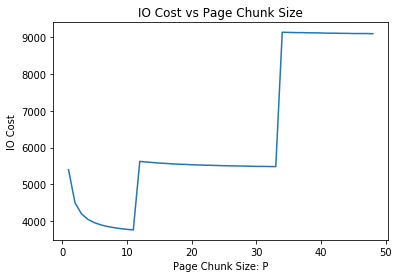

In [25]:
# Shell code for plotting in matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
plt.plot(*zip(*points))
plt.title("IO Cost vs Page Chunk Size")
plt.ylabel("IO Cost")
plt.xlabel("Page Chunk Size: P")
plt.show()

<hr><hr><hr>
<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=6>
<font style="color:blue;"><strong>پرسش ۲</strong> </font>
</font>
</div>

<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در این مساله می‌خواهیم هزینه‌ی الگوریتم‌های Join متفاوت را برای ادغام رابطه‌های $R(A,B)$، $S(B,C)$ و $T(C,D)$
دو به دو با یکدیگر مقایسه کنیم و بهترین روش Join را در چند حالت مختلف پیدا کنیم.
<br><br>
در هر یک از سناریو‌های مطرح شده می‌خواهیم مقدار تمام یا برخی از این متغیر‌ها را پیدا کنیم:
    
* `P_R`: تعداد صفحات $R$
* `P_S`: تعداد صفحات $S$
* `P_RS`: تعداد صفحات خروجی (و ورودی) $RS$
* `P_T`: تعداد صفحات $T$
* `P_RST`: تعداد صفحات خروجی (و ورودی) $RS$
* `B`: تعداد صفحات Buffer
* `IO_cost_join1`: هزینه‌ی کلی اولین Join بر حسب واحد IO
* `IO_cost_join2`: هزینه‌ی کلی دومین Join بر حسب واحد IO
<br><br>
نکات مهم:
* خروجی اولین Join همواره به عنوان یکی از ورودی‌های دومین Join داده می‌شود.
* در هیچ‌یک از الگوریتم‌های Join از Optimization های مطرح شده در Lecture ها استفاده نکنید و الگوریتم پایه را در نظر بگیرید.
* فرض کنید یکی از صفحات Buffer برای خروجی رزرو شده است.
* در این سوال از الگوریتم‌های(
Sort-Merge Join (SMJ)،
    Hash Join (HJ و
    (Block Nested Loop Join (BNLJ استفاده خواهیم‌کرد. 
</font>    
</div>

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
الف
<br><br><br>
با فرض:
    
* `P_R` = 20
* `P_S` = 200
* `P_T` = 2000
* `P_RS` = 100
* `P_ST` = 1000
* `P_RST` = 500
* `B` = 32
</font>    
</div>

<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
هزینه‌ی IO کلی هر یک از query plan های زیر را محاسبه کنید
</font>    
</div>

* IO_Cost_HJ_1 where only hash join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_HJ_2 where only hash join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$
* IO_Cost_SMJ_1 where only sort merge join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_SMJ_2 where only sort merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$
* IO_Cost_BNLJ_1 where only block nested loop join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_BNLJ_2 where only block nested loop merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$

<div style="direction:rtl;line-height:100%;">
<font style="direction:rtl;" face="XB Zar" size=3>
در مورد performance هر query plan یک یا دو جمله در قالب comment های پایتون توضیح دهید. 
</font>    
</div>


In [ ]:
#P_R: 20
#P_S: 200
#P_T: 2000
#P_RS: 100
#P_ST: 1000
#P_RST: 500
#B: 32 

# First we indicate each join formula, then all we have to do is to use them
# Block_Nested_Loop_Join IO Cost = P(R) + ceiling(P(R) / B - 1)(P(S)) + OUT
# Sort_Merge_Join IO Cost = 3(P(R) + P(S)) + OUT
# Hash_Join IO Cost = ~3(P(R) + P(S)) + OUT in case of needing partition else IO Cost = P(R) + P(S) + OUT

# IO_join1 = 20 + 200 + 100 OUT = 320 since there is no need to partition! 
# IO_join2 = 3 * (100 + 2000) + 500 OUT = 6800
# Total = IO_join1 + IO_join2 = 6800 + 320 = 7120

IO_Cost_HJ_1 = 7120 


# IO_join1 = 3(200 + 2000) + 1000 OUT = 7600
# IO_join2 = 1000 + 20 + 500 OUT = 1520
# Total = IO_join1 + IO_join2 = 7600 + 1520 = 9120

IO_Cost_HJ_2 = 9120

# join1:
# sort R = 2 * 20 = 40  (1 pass(R/W))
# sort S = 4 * 200 = 800  (2 pass(R/W))
# merge = 20 + 200 = 220  (1 pass(R))
# IO_join1 = 40 + 800 + 220 + 100 = 1160  

# join2:
# sort RS = 4 * 100 = 400  (2 pass(R/W)) 
# sort T = 6 * 2000 = 12000 (since B * (B - 1) = 992 < 2000 we need 3 pass(R/W))
# merge = 100 + 2000 = 2100 (1 pass(R))
# OUT = 500
# IO_join2 = 400 + 12000 + 2100 + 500 = 15000

# Total = IO_join1 + IO_join2 = 15000 + 1160 = 16160

IO_Cost_SMJ_1 = 16160

# join1:
# sort T = 6 * 2000 = 12000 (since B * (B - 1) = 992 < 2000 we need 3 pass(R/W))
# sort S = 4 * 200 = 800 (2 pass(R/W))
# merge = 200 + 2000 = 2200 (1 pass(R))
# OUT = 1000
# IO_join1 = 12000 + 800 + 2200 + 1000 = 16000

# join2:
# sort ST = 6 * 1000 = 6000 (3 pass(R/W))
# sort R = 2 * 20 = 40 (1 pass(R/W))
# merge = 20 + 1000 = 1020 (1 pass(R))
# OUT = 500
# IO_join2 = 6000 + 40 + 1020 + 500 = 7560

# Total = IO_join1 + IO_join2 = 16000 + 7560 = 23560

IO_Cost_SMJ_2 = 23560


# IO_join1 = 20 + ceiling(20/30) * 200 + 100 = 320
# IO_join2 = 100 + ceiling(100/30) * 2000 + 500 = 8600
# Total = IO_join1 + IO_join2 = 320+8600 = 8920

IO_Cost_BNLJ_1 = 8920

# IO_join1: 200 + ceiling(200/30) * 2000 + 1000 = 15200
# IO_join2: 20 + ceiling(20/30) * 1000 + 500 = 1520 
# Total = IO_join1 + IO_join2 = 15200 + 1520 = 16720

IO_Cost_BNLJ_2 = 16720

<hr><hr>
<div style="direction:rtl;line-height:200%;">
<font style="direction:rtl;" face="XB Zar" size=3>
ب
<br><br><br>
query plan 
ای را در نظر بگیرید که در آن
$join1 = R(a,b),S(b,c)$
و 
$join2 = join1(a,b,c),T(c,d)$
.
مقداردهی از متغیر‌ها را بیابید که استفاده از HJ برای $join1$ و SMJ برای $join2$ هزینه‌ی کمتری از استفاده‌ی SMJ برای $join1$ و استفاده از HJ برای $join2$ داشته باشد.
<br>
اندازه‌ی خروجی‌هایی که برای P_RS و P_RT تعیین می‌کنید بایستی غیر صفر و مقدار درستی باشد
(حداکثر اندازه‌ی خروجی برای $join1$ برابر P_R*P_S است).
</font>    
</div>

In [48]:
import math

# It seems clever to use HJ for join_1 When P_R is small and P_S is large enough.
# Also we can lessen join_2 inputs enough to make its cost small enough to not affect the comparison.
# so we set the values like below:

B = 15
P_R = 10 
P_S = 1500
P_T = 40
P_RS = 5
P_RST = 2

# These function are declared according to formulas used in previous part:
def IO_Cost_Cal(R, S, B, OUT, join_type):
    B -= 1
    if join_type == "HJ":
        first = min(R, S)
        cost = 2 * math.ceil(math.log(math.ceil(float(first)/(B - 1)), B)) * (R + S) + (R + S) + OUT
    elif join_type == "SMJ":
        cost = 2 * R * (1 + math.ceil(math.log(math.ceil(float(R)/(B + 1)), B))) + 2 * S * (1 + math.ceil(math.log(math.ceil(float(S)/(B + 1)), B))) + R + S + OUT
    return cost
        
query_plan1_IO_Cost = IO_Cost_Cal(P_R, P_S, B, P_RS, "HJ") + IO_Cost_Cal(P_RS, P_T, B, P_RST, "SMJ")
query_plan2_IO_Cost = IO_Cost_Cal(P_R, P_S, B, P_RS, "SMJ") + IO_Cost_Cal(P_RS, P_T, B, P_RST, "HJ")

print("Query Plan1:")
print("IO Cost Join 1(HJ) =", str(IO_Cost_Cal(P_R, P_S, B, P_RS, "HJ")))
print("IO Cost Join 2(SMJ) =", str(IO_Cost_Cal(P_RS, P_T, B, P_RST, "SMJ")))
print("IO Cost Total =", query_plan1_IO_Cost)
print()
print("Query Plan2:")
print("IO Cost Join 1(SMJ) =", str(IO_Cost_Cal(P_R, P_S, B, P_RS, "SMJ")))
print("IO Cost Join 2(HJ) =", str(IO_Cost_Cal(P_RS, P_T, B, P_RST, "HJ")))
print("IO Cost Total =", query_plan2_IO_Cost)
print()
print("As you see Query Plan1 is much more economical")

Query Plan1:
IO Cost Join 1(HJ) = 1515
IO Cost Join 2(SMJ) = 217
IO Cost Total = 1732

Query Plan2:
IO Cost Join 1(SMJ) = 10535
IO Cost Join 2(HJ) = 47
IO Cost Total = 10582

As you see Query Plan1 is much more economical


<hr><hr><hr>
<div style="line-height:300%;">
<font face="XB Zar" size=5>
موفّق و سلامت باشید
</font>
</div>